# Making a Baseline model

For the baseline model we will use a Logistic Regression algorithm
- We will import the dataset and drop the unwanted columns that we did in the EDA notebook
- Then we will partition the target variable 'Exited' from the rest of the dataset

In [1380]:
import pandas as pd
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [1381]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [1382]:
df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [1383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [1384]:
#selecting the target feature
exited = df['Exited'].values

#dropping the target variable from the dataset
df.drop(labels='Exited', axis=1, inplace=True)
df.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


As we saw in the EDA notebook the dataset has non-numerical data in the 'Geography', 'Gender', and 'CardType' columns, so to make sure that it is ready to put into a machine learning model we will make a dummy_df to encode the string values into numbers

In [1385]:
dummies_df = pd.get_dummies(data=df)

for col in dummies_df.columns:
    if dummies_df[col].dtype == 'bool':
        dummies_df[col] = dummies_df[col].astype('int32')

dummies_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


In [1386]:
# select categorical dtypes and numerical dtypes

non_numeric = df.select_dtypes(include=['object']).columns.to_list()

numeric = df.select_dtypes(exclude=['object']).columns.to_list()

print(numeric)
print(non_numeric)


['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
['Geography', 'Gender', 'Card Type']


### Split dataset into training and testing sets

In [1387]:
#setting randome_state and splitting the dataset into training and test sets
RANDOM_STATE = 3

X_train, X_test, y_train, y_test = train_test_split(dummies_df, exited, test_size=.30, stratify=exited, random_state=RANDOM_STATE)

print(
    f'X_train size: {X_train.shape}\ny_train size: {y_train.shape}\nX_test size: {X_test.shape}\ny_test size: {y_test.shape}'
)

X_train size: (7000, 20)
y_train size: (7000,)
X_test size: (3000, 20)
y_test size: (3000,)


### Baseline model

We import the LogisticRegression model, instantiate the model, fit the model to our training set, and then make predictions on the testing set

In [1388]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=RANDOM_STATE)

logreg.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

In [1389]:
y_pred = logreg.predict(X_test)
print(f'Predictions:\n{list(y_pred[:20])}\n')
print(f'Ground truth labels:\n{list(y_test[:20])}')

Predictions:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]

Ground truth labels:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]


### Scoring

The classification report shows an accuracy of .84, a precision score of .79, a recall score of .68, and an f-1 score of .71. Since it is drastically more expensive to gain new customers as it is to retain existing customers, the metrics we use in determining the strength of the model will be critical. With this being said the metric(s) to use will be the recall and f-1 score, because of the need to accurately predict the true positive rate or in this case the people who are accurately predicted to exit the bank.

In [1390]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

# print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test, y_pred)}')
# print(f'Precision score: {precision_score(y_test, y_pred)}')
# print(f'f-1 score: {f1_score(y_test, y_pred)}')
confusion_matrix_ = confusion_matrix(y_test, y_pred)

# # print(f'Confusion matrix:\n {confusion_matrix_}')

# print('-'*90)
# tn, fp, fn, tp = confusion_matrix_.ravel()
# print(f'True Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}\nTrue Positive: {tp}')


In [1391]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2389
           1       0.71      0.39      0.51       611

    accuracy                           0.84      3000
   macro avg       0.79      0.68      0.71      3000
weighted avg       0.83      0.84      0.83      3000



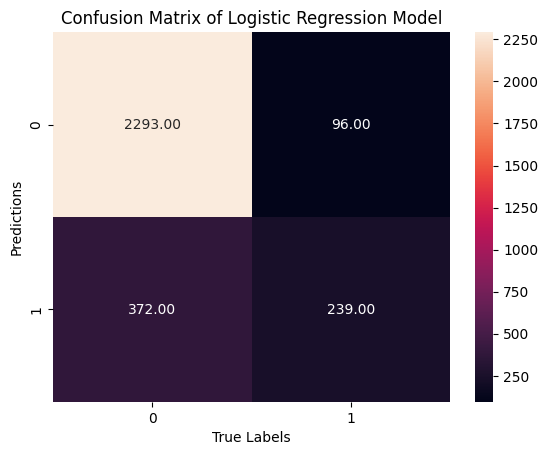

In [1392]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=confusion_matrix_, annot=True, fmt='.2f')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

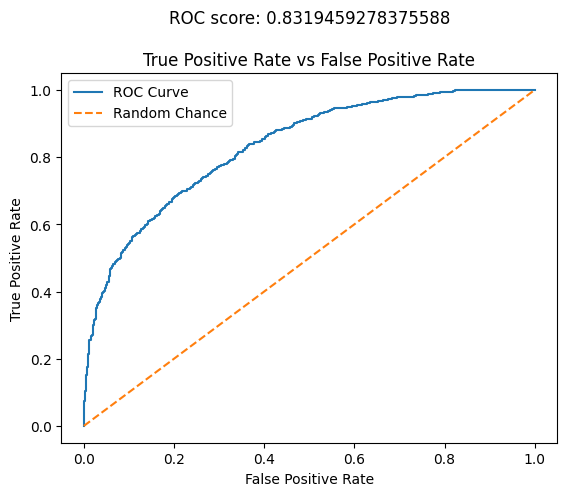

In [1393]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot((0, 1), linestyle='--', label='Random Chance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC score: {roc_auc_score(y_test, y_prob)}\n\nTrue Positive Rate vs False Positive Rate')
plt.show()

The above two graphs show predicted values and true values in a confusion matrix and in an ROC curve. 
* The confusion matrix shows true negatives in the top left corner and the true positive values in the bottom corner
* The next graph shows an ROC score of .83, meaning that at around a ~40% false positive rate will yield a ~83% chance that the model will predict a true positive value

The .68 recall score and .71 f1-score will be a good starting point for future iterations of different types of models

In [1394]:
# from sklearn.compose import make_column_transformer

# preprocess = make_column_transformer(
#     (OneHotEncoder(), non_numeric),
#     (MinMaxScaler(), numeric)
# )

# preprocess

In [1395]:
# from sklearn.pipeline import make_pipeline

# pipeline = make_pipeline(preprocess, svm.SVC(random_state=RANDOM_STATE))
# pipeline


In [1396]:
# pipeline.get_params

In [1397]:
# pipeline.fit(X_train, y_train)